The data for this project comes from a subset of The National Centers for Environmental Information (NCEI) Global Historical Climatology Network daily. It is comprised of daily climate records from thousands of land surface stations across the globe. I will be using data from the Ann Arbor Michigan location.

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
- id : station identification code
- date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
- element : indicator of element type
    - TMAX : Maximum temperature (tenths of degrees C)
    - TMIN : Minimum temperature (tenths of degrees C)
- value : data value for element (tenths of degrees C)

I will plot line graphs of the record high and record low temperatures by day of the year over the period 2005-2014 and overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
df = pd.read_csv('data\GHCN-Daily.csv')

# transforming the data into Celcius 
df["Data_Value"] = df["Data_Value"]/10

# extracting all of the rows which have minimum or maximum temperatures
df_max = df[df["Element"]=="TMAX"]
df_min = df[df["Element"]=="TMIN"]

# creating max and min temperature Series objects across all weather stations for each day of these years
df_max = df_max.groupby("Date").max()
df_min = df_min.groupby("Date").min()

# dropping records for February 29
df_max = df_max[(df_max.index!='2008-02-29')&(df_max.index!='2012-02-29')]
df_max.index = pd.to_datetime(df_max.index)
df_min = df_min[(df_min.index!='2008-02-29')&(df_min.index!='2012-02-29')]
df_min.index = pd.to_datetime(df_min.index)

# calculating the minimum and maximum values for the day of the year for 2005 through 2014
df_max_2005_2014=df_max[df_max.index<pd.to_datetime("2015-01-01")]
df_max_2005_2014["M"] = df_max_2005_2014.index.month
df_max_2005_2014["D"] = df_max_2005_2014.index.day
df_max_2005_2014 = df_max_2005_2014.groupby(["M", "D"]).max()
df_max_2005_2014.reset_index(inplace=True)
df_min_2005_2014=df_min[df_min.index<pd.to_datetime("2015-01-01")]
df_min_2005_2014["M"] = df_min_2005_2014.index.month
df_min_2005_2014["D"] = df_min_2005_2014.index.day
df_min_2005_2014 = df_min_2005_2014.groupby(["M", "D"]).min()
df_min_2005_2014.reset_index(inplace=True)

# calculating the minimum and maximum values for the year 2015
df_max_2015 = df_max[df_max.index > "2014-12-31"]
df_max_2015.reset_index(inplace=True)
df_max_broken= df_max_2015[df_max_2015["Data_Value"]>df_max_2005_2014["Data_Value"]]
df_min_2015 = df_min[df_min.index > "2014-12-31"]
df_min_2015.reset_index(inplace=True)
df_min_broken= df_min_2015[df_min_2015["Data_Value"]<df_min_2005_2014["Data_Value"]]

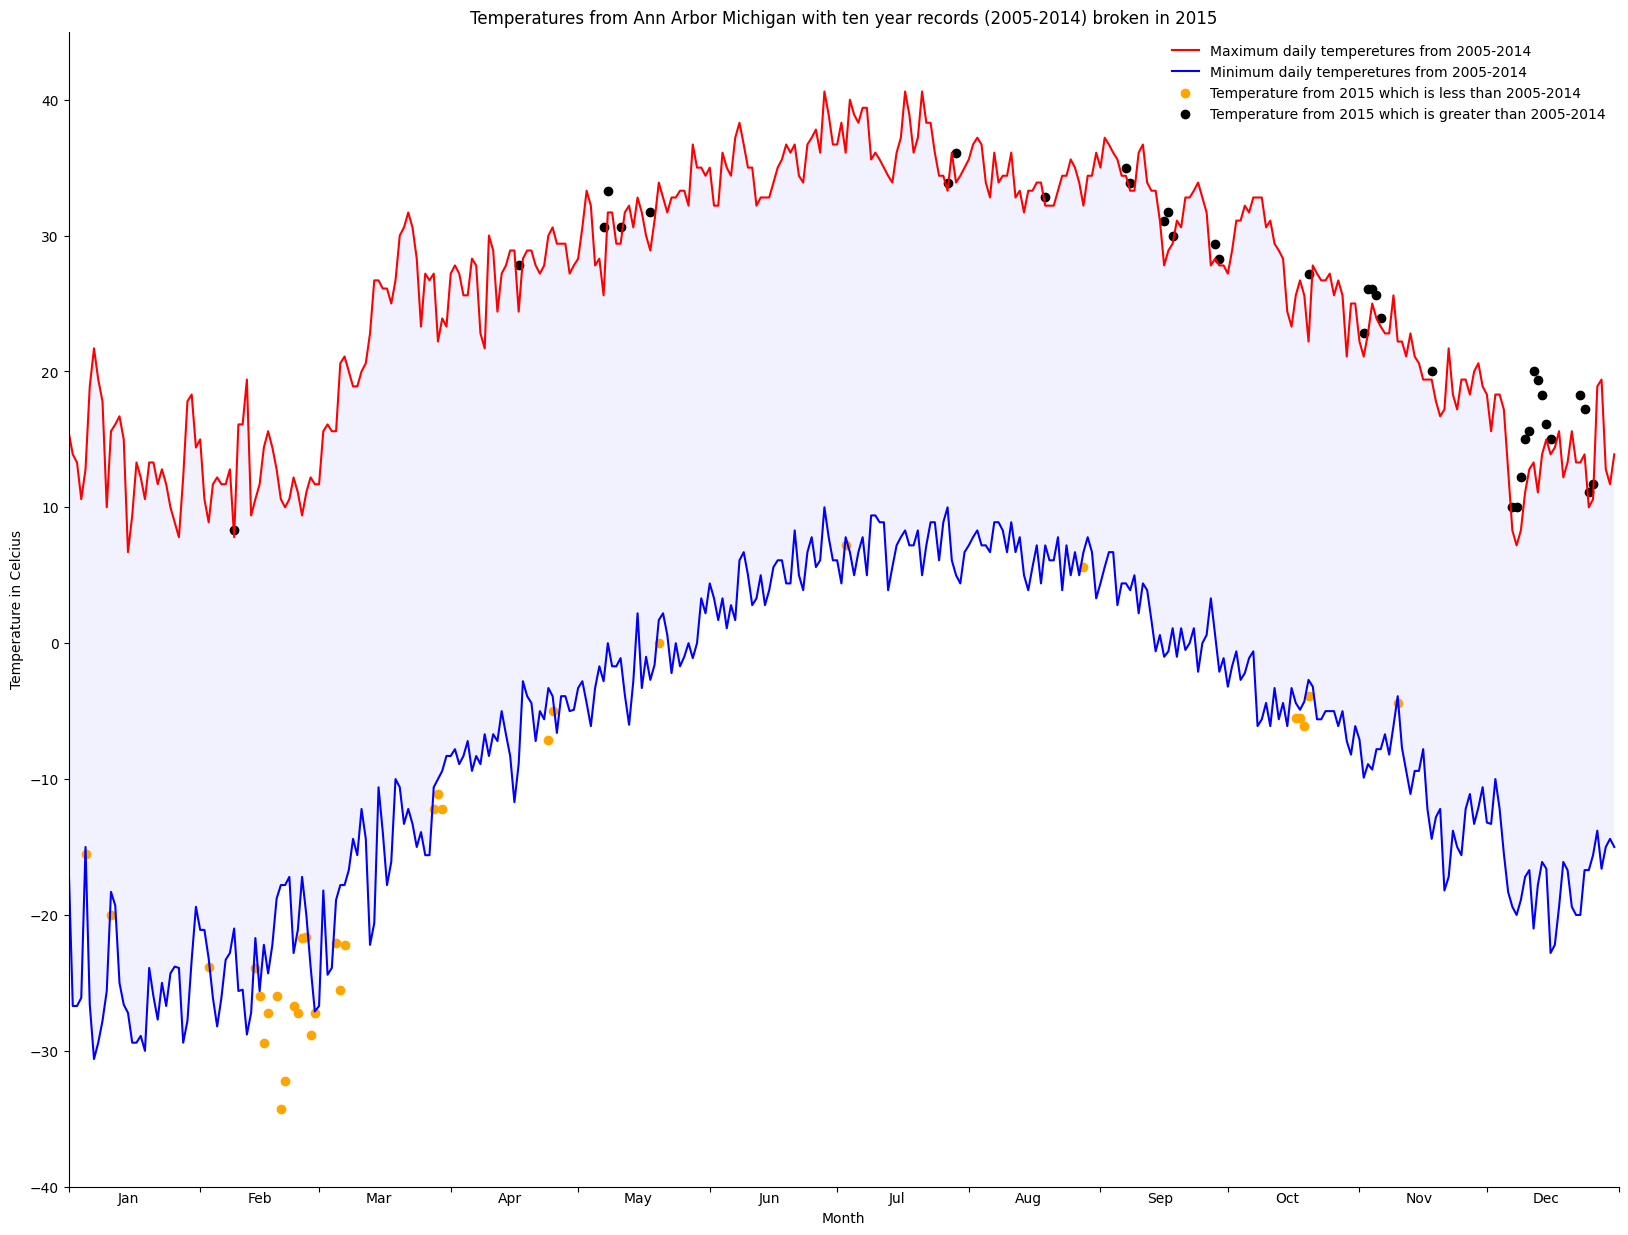

In [37]:
plt.figure(figsize=(20,15))
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.title("Temperatures from Ann Arbor Michigan with ten year records (2005-2014) broken in 2015")
ax=plt.gca()

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

plt.plot(df_max_2005_2014["Data_Value"], color="r", label="Maximum daily temperetures from 2005-2014")
plt.plot(df_min_2005_2014["Data_Value"], color="b",  label="Minimum daily temperetures from 2005-2014")
# shading area between the record high and record low temperatures (abowe plots)
plt.gca().fill_between(range(len(df_max_2005_2014)), df_min_2005_2014["Data_Value"], df_max_2005_2014["Data_Value"], facecolor="blue", alpha=0.05)
plt.gca().axis([0,365, -40, 45])
plt.scatter(df_min_broken.index, df_min_broken["Data_Value"], color="orange", label="Temperature from 2015 which is less than 2005-2014")
plt.scatter(df_max_broken.index, df_max_broken["Data_Value"], color="black", label="Temperature from 2015 which is greater than 2005-2014")

plt.legend(loc=1, frameon=False)

# setting month ticks on x-axis at the middle of each month
months = mdates.MonthLocator(bymonth =(1,2,3,4,5,6,7,8,9,10,11,12), bymonthday=15 )
allmonths = mdates.MonthLocator()
m_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(allmonths)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_minor_formatter(m_fmt)
ax.tick_params(axis="x", which="minor", length=0)

Based on the graph, I think extreme weather is getting more frequent in 2015.